In [1]:
import pandas as pd
import numpy as np
import wave
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from psds_eval import PSDSEval

In [2]:
reference = pd.read_csv('../data/test.csv')
prediction = pd.read_csv('../predictions/jannes/LP1d_Prediction_pp_test_probs.csv')
labels = ['Bark', 'Burping_and_eructation', 'Camera', 'Cheering', 'Church_bell', 'Cough', 'Doorbell', 'Fireworks', 'Meow', 'Scratching_(performance_technique)', 'Shatter', 'Shout']
colors = ['red','green', 'orange', 'violet', 'blue', 'darkgreen', 'turquoise', 'darkblue', 'brown', 'darkred', 'gray', 'lightblue']
fs = 16000

In [3]:
def score_all(hyp_data, ref_data):
    # as the unique files are the same, only one unique call is enough
    metadata = pd.DataFrame(np.unique(hyp_data['filename']), columns=['filename'])
    metadata = metadata.assign(duration=10)

    psds_eval = PSDSEval(ground_truth=ref_data, metadata=metadata)
    info = {"threshold": 0.5}
    psds_eval.add_operating_point(hyp_data, info=info)
    return psds_eval.psds(max_efpr=100).value

Reference

Prediction
Church_bell   0.9913790859282016
Shatter   0.9835638192392164
Cheering   0.998285585641861


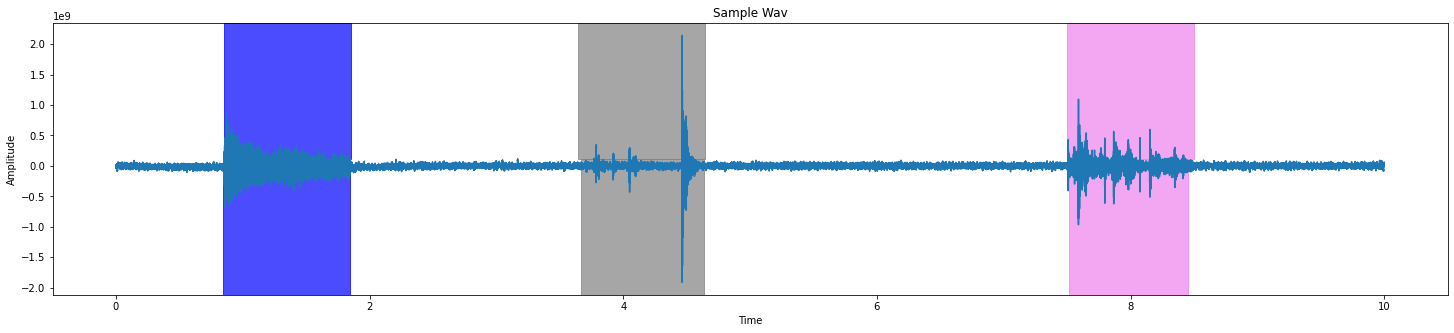

1.0


In [4]:
file = "09070_mix.wav"
referenceLabel = reference.loc[reference["filename"]==file]
predictionLabel = prediction.loc[prediction["filename"]==file]

plt.figure(figsize=(25,5))
# read audio samples
input_data = read("../data/final_pre_dataset/dev/"+file)
audio = input_data[1]
time=np.linspace(0, len(audio)/fs, num=len(audio))
plt.plot(time,audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Sample Wav")

print("Reference")
for index,row in referenceLabel.iterrows():
    plt.axvspan(row['onset'], row['offset'], alpha=0.7, color=colors[labels.index(row['event_label'])], ymin=0.5, ymax=1)
    #print(row["event_label"])
print("\nPrediction")
for index,row in predictionLabel.iterrows():
    plt.axvspan(row['onset'], row['offset'], alpha=0.7, color=colors[labels.index(row['event_label'])], ymin=0, ymax=0.5)
    print(row["event_label"]+"   "+str(row["MeanProb"]))
plt.show()
print(score_all(predictionLabel, referenceLabel))

# Challenge-Prediction visualisieren

Challenge Prediction 1
Burping_and_eructation   0.5259758204629179
Shatter   0.965544886448804
Church_bell   0.9747198635134204
Cheering   0.904917218722403

Challenge Prediction 2
Burping_and_eructation   0.9934374297920028
Shatter   0.9702054805225796
Cheering   0.9922541905390588


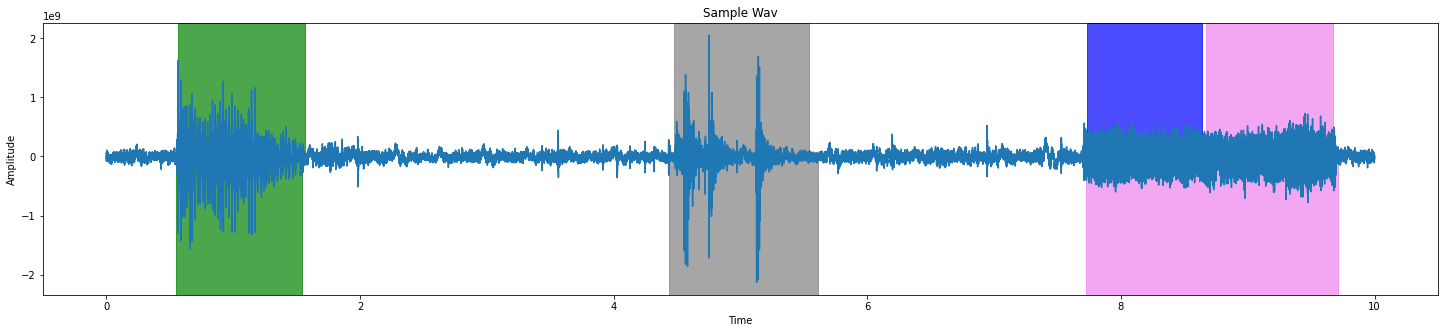

In [82]:
file = "11259_mix.wav"

chalPrediction1 = pd.read_csv('../predictions/jannes/LP1d_PredictionChallenge_probs.csv')
label1 = chalPrediction1.loc[chalPrediction1["filename"]==file]

chalPrediction2 = pd.read_csv('../predictions/jannes/LP1d_PredictionChallenge_mel_probs.csv')
label2 = chalPrediction2.loc[chalPrediction2["filename"]==file]

plt.figure(figsize=(25,5))
# read audio samples
input_data = read("../data/final_pre_dataset/eval/"+file)
audio = input_data[1]
time=np.linspace(0, len(audio)/fs, num=len(audio))
plt.plot(time,audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Sample Wav")

print("Challenge Prediction 1")
for index,row in label1.iterrows():
    plt.axvspan(row['onset'], row['offset'], alpha=0.7, color=colors[labels.index(row['event_label'])], ymin=0.5, ymax=1)
    print(row["event_label"]+"   "+str(row["MeanProb"]))
print("\nChallenge Prediction 2")
for index,row in label2.iterrows():
    plt.axvspan(row['onset'], row['offset'], alpha=0.7, color=colors[labels.index(row['event_label'])], ymin=0, ymax=0.5)
    print(row["event_label"]+"   "+str(row["MeanProb"]))
plt.show()